In [1]:
import os
# Change the working directory to the project's root
project_root = os.path.dirname(os.getcwd())
os.chdir(project_root)

# CLS interpolation

### Loading data

In [2]:
import pandas as pd
from src.utils import *
from src.dates import *
# Load the data
excel = pd.read_csv('data/CLS_DS.csv')

# Extract the data for 2021, 2022, and 2023
cls_2021 = excel[['Plot','D0','D1','D2', 'D3','D4','D5']][:40]
cls_2021.set_index('Plot', inplace=True)
cls_2021.columns = d_day_2021

cls_2022 = excel[['Plot','D0','D1','D2', 'D3','D4','D5']][40:80]
cls_2022.set_index('Plot', inplace=True)
cls_2022.columns = d_day_2022

cls_2023 = excel[['Plot','D0','D1','D2', 'D3','D4','D5','D6']][80:]
cls_2023.set_index('Plot', inplace=True)
cls_2023.columns = d_day_2023

# Interpolate the data
cls_interp_2021 = interpolate_dataframe(cls_2021, f_day_2021, method='quadratic')
cls_interp_2022 = interpolate_dataframe(cls_2022, f_day_2022, method='quadratic')
cls_interp_2023 = interpolate_dataframe(cls_2023, f_day_2023, method='quadratic')

### Visualisation

#### 2021

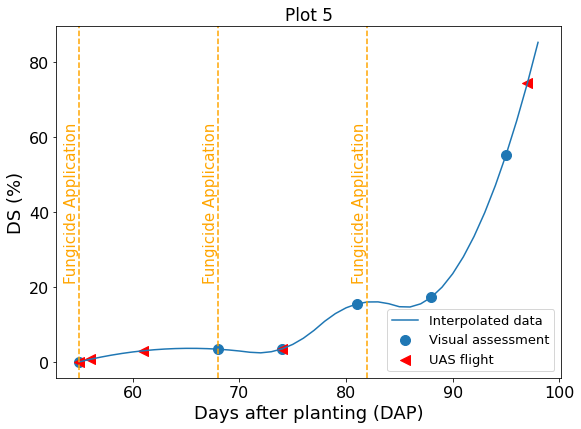

In [5]:
import matplotlib.pyplot as plt

plt_num = 5  ## Plot number to plot
f_day =f_day_2021
cls = cls_2021
cls_interpolated = interpolate_dataframe(cls, range(55, 99), method='quadratic')
plt.figure(figsize=(8, 6))
cls_interpolated.T[plt_num].plot(label='Interpolated data');
plt.scatter(cls.columns, cls.T[plt_num], marker = 'o', label='Visual assessment', s=100);
plt.scatter(f_day, cls_interpolated[f_day].T[plt_num], marker = '<', label='UAS flight', s=100, color='r');
plt.xlabel('Days after planting (DAP)', fontsize=18);
plt.ylabel('DS (%)', fontsize=18);
plt.title(f'Plot {plt_num}', fontsize=17);
plt.legend(fontsize=13);
plt.tight_layout();

fung = [55, 68, 82]  # fungicide application dates same for both 2021 and 2022
for f in fung:
    plt.axvline(f, color='orange', linestyle='--')
    y_center = (plt.ylim()[0] + plt.ylim()[1]) / 2
    plt.text(f, y_center, 'Fungicide Application', rotation=90, verticalalignment='center', horizontalalignment='right', color='orange', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=16)

plt.savefig('figures/cls_interpolation_21.png')

#### 2022

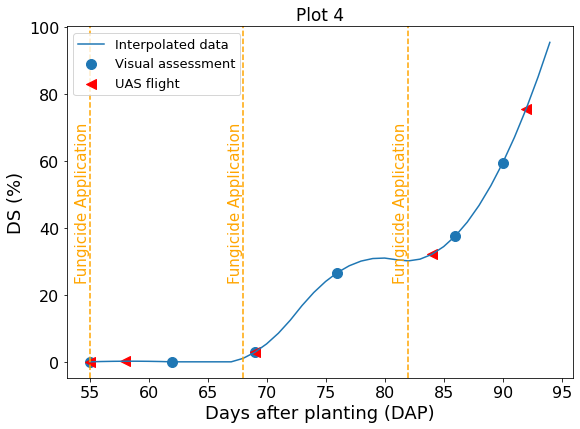

In [6]:
plt_num = 4
f_day =f_day_2022
cls = cls_2022
cls_interpolated = interpolate_dataframe(cls, range(55, 95), method='quadratic')
plt.figure(figsize=(8, 6))
cls_interpolated.T[plt_num].plot(label='Interpolated data');
plt.scatter(cls.columns, cls.T[plt_num], marker = 'o', label='Visual assessment', s=100);
plt.scatter(f_day, cls_interpolated[f_day].T[plt_num], marker = '<', label='UAS flight', s=100, color='r');
plt.xlabel('Days after planting (DAP)', fontsize=18);
plt.ylabel('DS (%)', fontsize=18);
plt.title(f'Plot {plt_num}', fontsize=17);
plt.legend(fontsize=13);
plt.tight_layout();

fung = [55, 68, 82]  # fungicide application dates same for both 2021 and 2022
for f in fung:
    plt.axvline(f, color='orange', linestyle='--')
    y_center = (plt.ylim()[0] + plt.ylim()[1]) / 2
    plt.text(f, y_center, 'Fungicide Application', rotation=90, verticalalignment='center', horizontalalignment='right', color='orange', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('figures/cls_interpolation_22.png')

#### 2023 

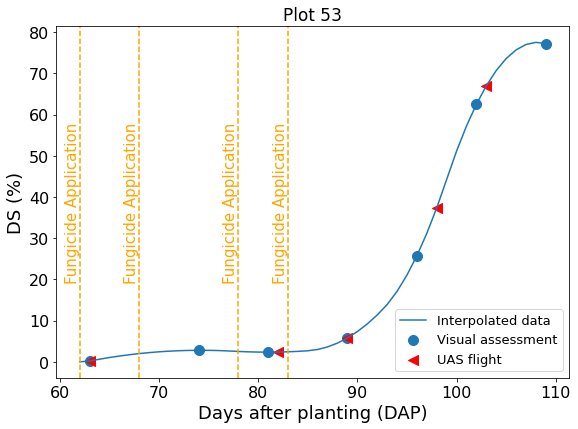

In [8]:
plt_num = 53 ## Plot number to plot
f_day =f_day_2023
cls = cls_2023
cls_interpolated = interpolate_dataframe(cls, range(62, 110), method='quadratic')
plt.figure(figsize=(8, 6))
cls_interpolated.T[plt_num].plot(label='Interpolated data');
plt.scatter(cls.columns, cls.T[plt_num], marker = 'o', label='Visual assessment', s=100);
plt.scatter(f_day, cls_interpolated[f_day].T[plt_num], marker = '<', label='UAS flight', s=100, color='r');
plt.xlabel('Days after planting (DAP)', fontsize=18);
plt.ylabel('DS (%)', fontsize=18);
plt.title(f'Plot {plt_num}', fontsize=17);
plt.legend(fontsize=13);
plt.tight_layout();

fung = [62, 68, 78, 83]  
for f in fung:
    plt.axvline(f, color='orange', linestyle='--')
    y_center = (plt.ylim()[0] + plt.ylim()[1]) / 2
    plt.text(f, y_center, 'Fungicide Application', rotation=90, verticalalignment='center', horizontalalignment='right', color='orange', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('figures/cls_interpolation_23.png')

# Study plot and feature visualisation

## Loading data

In [34]:
import pickle
import pandas as pd
from src.misc import remove_columns_ending_with_0

zipped_im21_22 = pickle.load(open('data/ziped_21_22.pkl', 'rb'))
zipped_im23 = pickle.load(open('data/ziped_23.pkl', 'rb'))
zipped_im = {**zipped_im21_22, **zipped_im23}

prep_dir = 'data/preprocessed_data/'

#For wavelength combinations
wave_comb21_22 = np.array([475,560,668,717,840])
wave_comb23 = np.array([560, 650, 730, 860])

#### loading vegetation masked images
zipped_veg_im21_22 = pickle.load(open(prep_dir + 'veg_im21_22.pkl', 'rb'))
zipped_veg_im23 = pickle.load(open(prep_dir + 'veg_im23.pkl', 'rb'))
zipped_veg_im = {**zipped_veg_im21_22, **zipped_veg_im23}

Data_21_22=pd.read_csv(prep_dir + 'feat_21_22.csv', header=0)
Data23 = pd.read_csv(prep_dir + 'feat_23.csv', header=0)
########################################################################

##### combining 21 and 23 data
Data_21_22 = remove_columns_ending_with_0(Data_21_22)   # removes blue features
Data21 = Data_21_22.iloc[:200]
Data22 = Data_21_22.iloc[200:]
Data = pd.concat([Data21, Data22, Data23])

## Visualisation

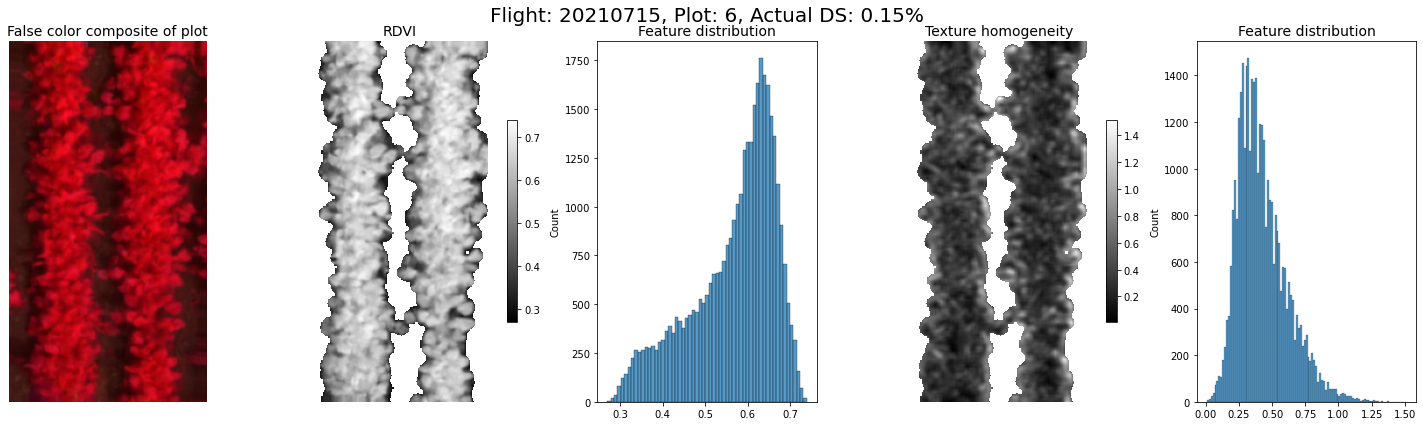

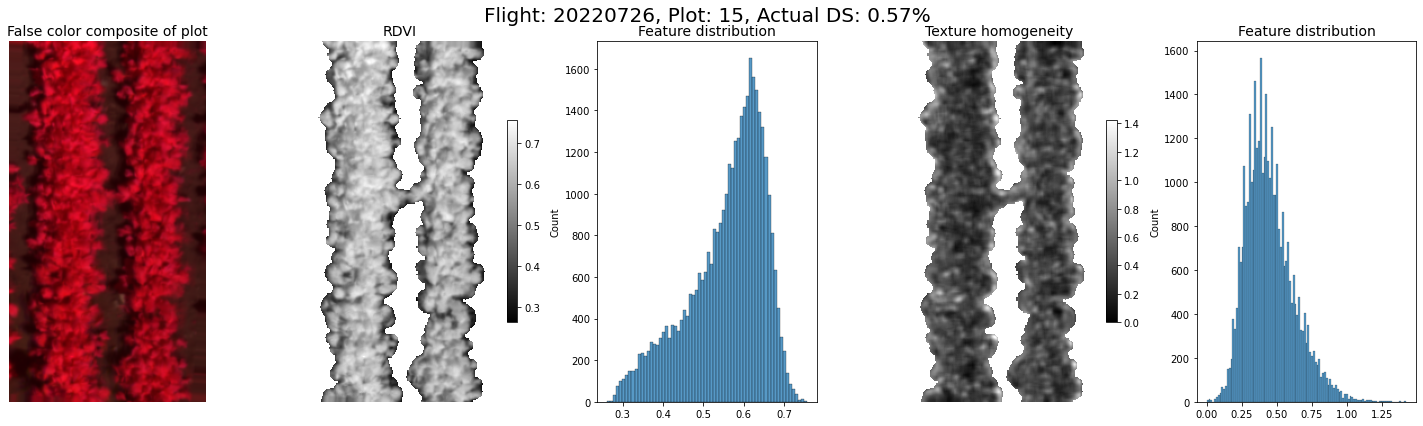

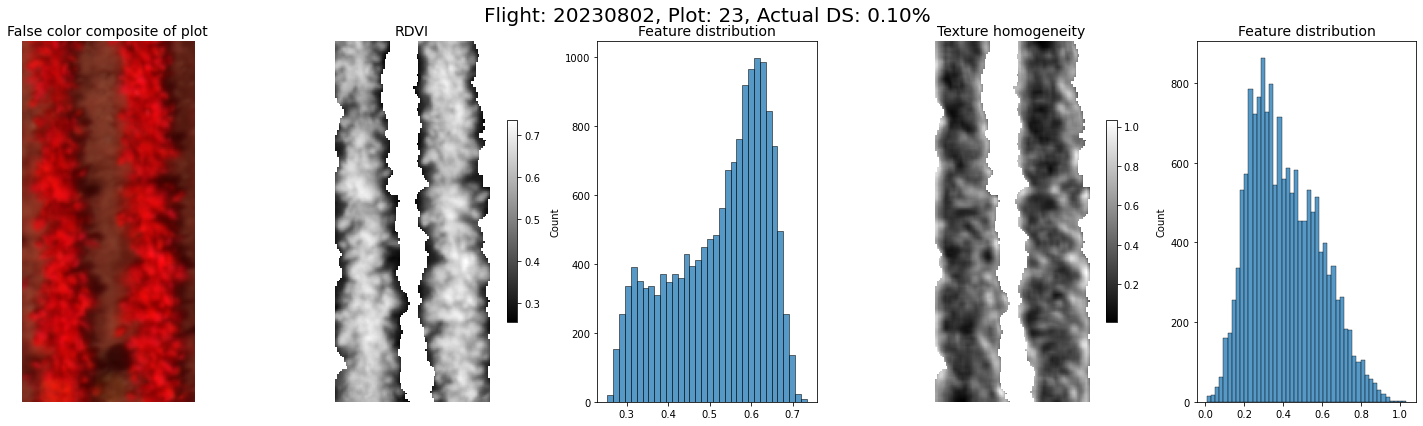

In [40]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
from src.feature_extraction import *

def plt_img_dist(img_dict, veg_img_dict,Data,fl_plt_df):
    
    num_im = len(fl_plt_df)
    #fig, axes = plt.subplots(num_im, 3, figsize=(4*3,6*num_im))
    for flight, plot in fl_plt_df.values:
        fig, axes = plt.subplots(1, 5, figsize=(4*5,6*1))      # draw new figures each time
        ds = Data.loc[(Data['Flight'] == flight) & (Data['Plot'] ==plot), 'CLS_score'].item()
        fig.suptitle(f'Flight: {flight}, Plot: {plot}, Actual DS: {ds*100:.2f}%',fontsize=20)
        
        # Define the band combination for the false color composite
        if str(flight).startswith('2023'):
            band_comb = [3,1,0]
            wave_comb = wave_comb23
            band_num = 3
        else:
            band_comb = [4,2,1]
            wave_comb = wave_comb21_22
            band_num = 4

        # Extract the image from the dictionary
        im  =  veg_img_dict[str(flight)][plot]

        # Plot the image
        axes[0].axis('off')  
        axes[0].set_title(f'False color composite of plot',fontsize=14)
        axes[0].imshow(Normalize()(img_dict[str(flight)][plot][:,:,band_comb]))

        # Plot the RDVI map
        feat_im = VI(wave_comb,840,668).RD(conv2value(im).T).T
        axes[1].axis('off')
        axes[1].set_title('RDVI',fontsize=14)
        im_ax1 = axes[1].imshow(feat_im, cmap='gray')
        cbar = plt.colorbar(im_ax1, ax=axes[1], fraction=0.046, pad=0.04)

        # Plot the distribution of the features
        axes[2].set_title('Feature distribution',fontsize=14)
        sns.histplot(np.ravel(feat_im), ax=axes[2])

        # Plot the tex_homogeneity feature
        tex = fastglcm_wrapper(im,levels=8,kernel_size=5,distance_offset=5,angles=[0,45,90,135])
        tex_im = mask4tex(tex.calculate_glcm_dissimilarity(),im)[:,:,band_num]
        axes[3].axis('off')
        axes[3].set_title('Texture homogeneity',fontsize=14)
        im_ax2 = axes[3].imshow(tex_im, cmap='gray')
        cbar2 = plt.colorbar(im_ax2, ax=axes[3], fraction=0.046, pad=0.04)

        # Plot the distribution of the features
        axes[4].set_title('Feature distribution',fontsize=14)
        sns.histplot(np.ravel(tex_im), ax=axes[4])

        fig.tight_layout()
        fig.subplots_adjust(top=0.9)
    return


# Define the flight and plot numbers add as many as you want
flight_plot={'Flight':[20210715, 20220726, 20230802],
             'Plot':[6, 15, 23]}
fl_plt_df = pd.DataFrame(flight_plot)

plt_img_dist(zipped_im,zipped_veg_im,Data,fl_plt_df)

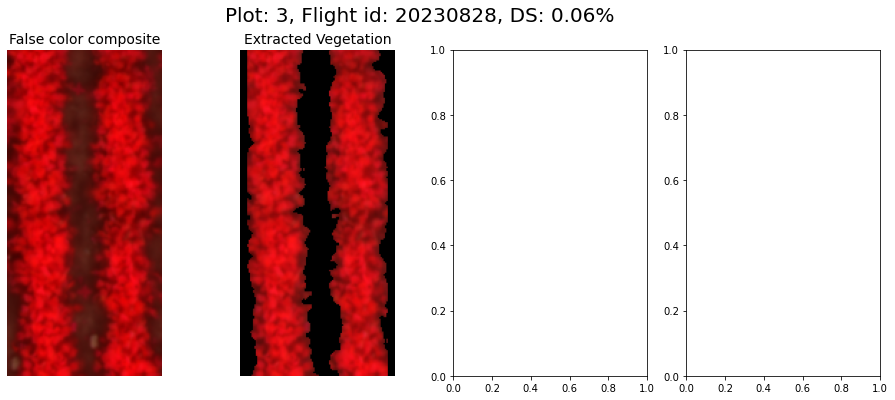

In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns

plot = 3             # study plot number
flight = 20230828    # flight date 

cls = Data.loc[(Data['Flight'] == flight) & (Data['Plot'] == plot), 'CLS_score'].item()
# Define the band combination for the false color composite
if str(flight).startswith('2023'):
    band_comb = [3,1,0]
    band_num = 3
else:
    band_comb = [4,2,1]
    band_num = 4

fig, axes = plt.subplots(1,4, figsize=(4*4,6*1))
fig.suptitle(f'Plot: {plot}, Flight id: {flight}, DS: {cls:.2f}%',fontsize=20)

axes[0].axis('off')
axes[0].set_title(f'False color composite',fontsize=14)
axes[0].imshow(Normalize()(zipped_im[str(flight)][plot][:,:,band_comb]))

axes[1].axis('off')
axes[1].set_title(f'Extracted Vegetation',fontsize=14)
axes[1].imshow(Normalize()(zipped_veg_im[str(flight)][plot][:,:,band_comb]))